<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/%EC%A4%91%EA%B8%89/19%EC%9D%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron

In [ ]:
# 활성화함수 sigmoid 일때  LogisticReression, linear 모델 일때는 LinearRegressin   =>  알고리즘 모델링 그래서 복잡

# Perceptron (classification, regression 둘다에서 사용가능, 유연한 모델 가능)  
#=> 즉 Neural Network(NN)도 마찬가지

In [ ]:
# -> perceptron 현재 연구 진행 거의 안됨 (CS는 성능 높히는 것이 중요, 다른 알고리즘 많으니)

In [ ]:
# -> LinearRegression, LogisticRegression 설명가능해서 통계학자는 아직도 연구 중

In [28]:
p = Perceptron()

In [29]:
p.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [30]:
lr = LogisticRegression()

In [31]:
set(lr.get_params()) - set(p.get_params())

{'C', 'dual', 'intercept_scaling', 'multi_class', 'solver'}

In [32]:
set(p.get_params()) - set(lr.get_params())

{'alpha',
 'early_stopping',
 'eta0',
 'n_iter_no_change',
 'shuffle',
 'validation_fraction'}

In [ ]:
# 서로 관점들이 조금 다르지만 상호 교체 가능하다 => 분석쪽은 퍼셉트론 사용안함

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris(as_frame=True)

In [4]:
import seaborn as sns

In [18]:
iris = data.frame

In [8]:
iris.species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

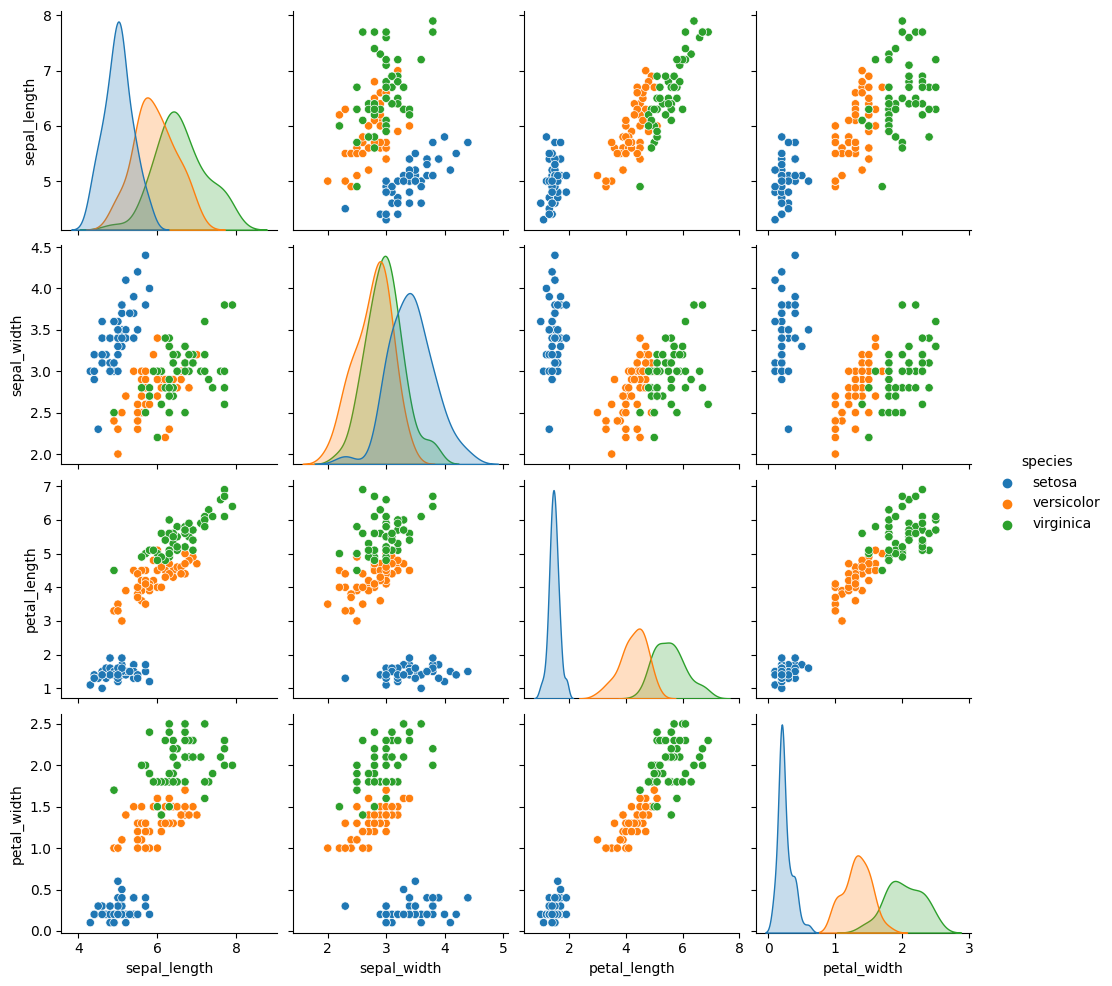

In [13]:
sns.pairplot(iris, hue='species')

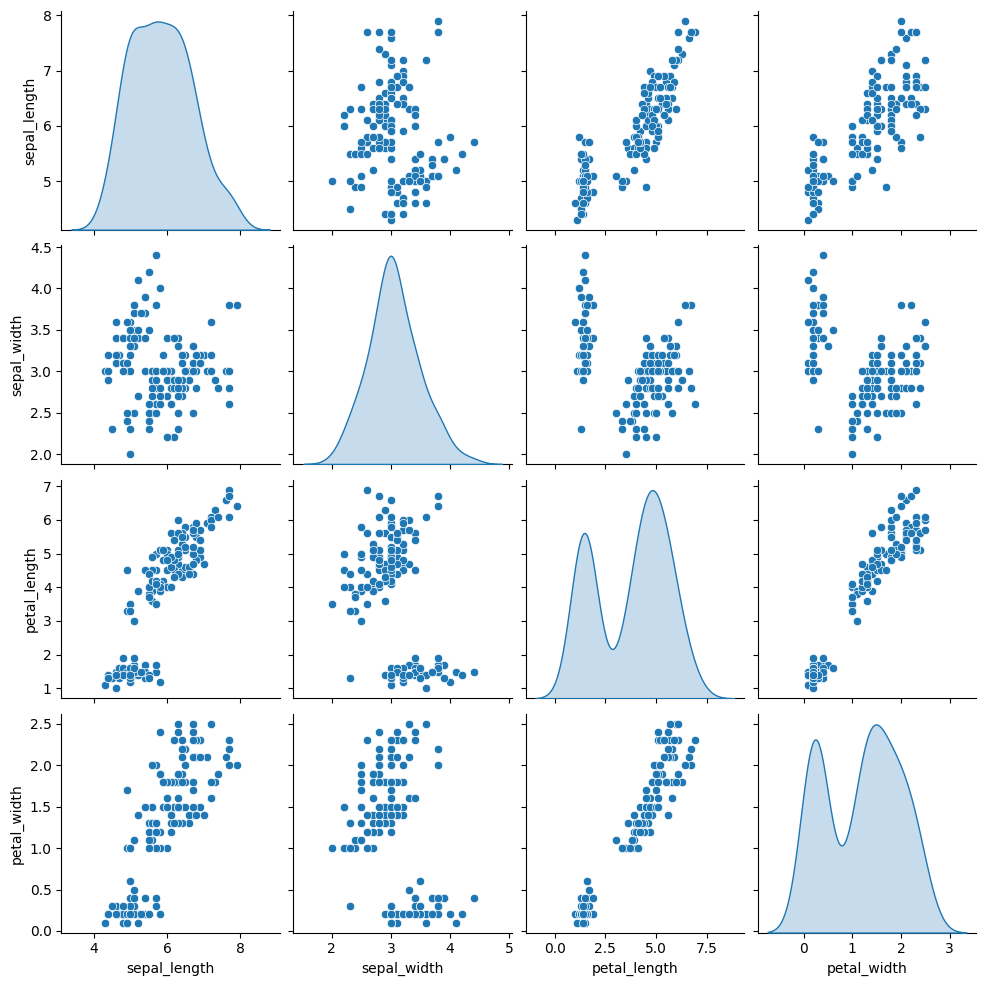

In [12]:
sns.pairplot(iris, diag_kind='kde')

#데이터 모델링

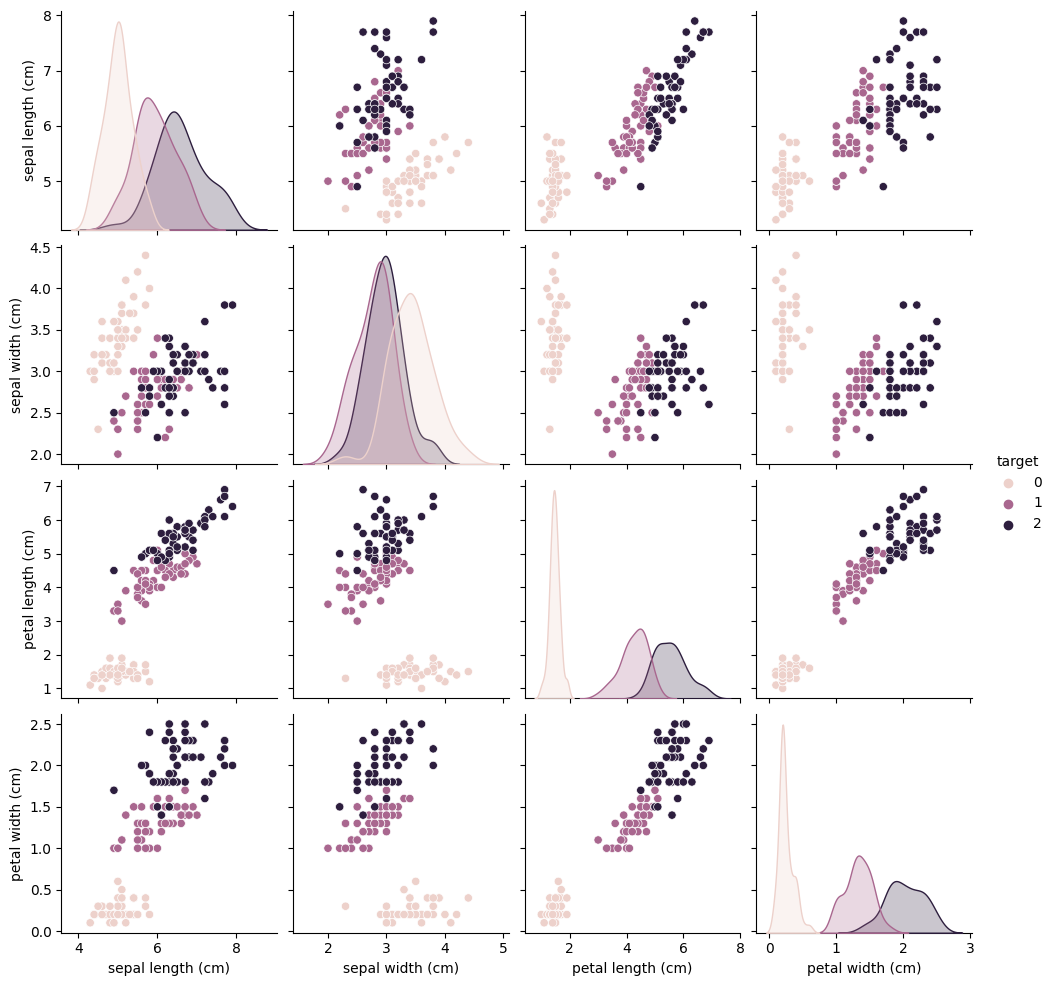

In [19]:
sns.pairplot(iris, hue='target')

#Linear 할 것이다 그림에서 가정하고 모델링 선택

In [ ]:
from sklearn.linear_model import LogisticRegression    #가정   가정이 맞는지 검증

In [22]:
import statsmodels.api as sm

In [20]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [ ]:
#m = sm.Logit(iris[['target']], iris.iloc[:,:-1])   => 0,1 만 multiclass 안됨

In [ ]:
데이터 통해 알파 베타 등 파라미터 찾기

In [24]:
m = sm.GLS(iris['target'], iris.iloc[:,:-1]) #=>  generalize list square => logisticregression도 linear도 됨

In [25]:
t = m.fit()

In [26]:
t.summary()  #> 얼마나 맞는지 안맞는지 검증  , Residuals:얼마나 차이나나

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 GLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.972
Model:                            GLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1267.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):                   3.17e-112
Time:                        03:46:44   Log-Likelihood:                          17.009
No. Observations:                 150   AIC:                                     -26.02
Df Residuals:                     146   BIC:                                     -13.98
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
sepal length (cm)    -0.0845      0.049     -1.720      0.088      -0.182       0.013
sepal width (cm)     -0.0236      0.057     -0.415      0.679      -0.136       0.089
petal length (cm)     0.2249      0.057      3.968      0.000       0.113       0.337
petal width (cm)      0.5997      0.094      6.392      0.000       0.414       0.785
==============================================================================
Omnibus:                        0.384   Durbin-Watson:                   1.149
Prob(Omnibus):                  0.825   Jarque-Bera (JB):                0.128
Skew:                          -0.026   Prob(JB):                        0.938
Kurtosis:                       3.133   Cond. No.                         50.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
t.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Generalized least squares
===============================================================================
Model:                  GLS              Adj. R-squared (uncentered): 0.971    
Dependent Variable:     target           AIC:                         -26.0187 
Date:                   2023-08-05 03:46 BIC:                         -13.9761 
No. Observations:       150              Log-Likelihood:              17.009   
Df Model:               4                F-statistic:                 1267.    
Df Residuals:           146              Prob (F-statistic):          3.17e-112
R-squared (uncentered): 0.972            Scale:                       0.047948 
----------------------------------------------------------------------------------
                      Coef.     Std.Err.       t       P>|t|      [0.025    0.975]
----------------------------------------------------------------------------------
sepal length (cm)    -0.0845      0.0491    -1.7198    0.0876    -0.1816    0.0126
sepal width (cm)     -0.0236      0.0568    -0.4146    0.6790    -0.1359    0.0888
petal length (cm)     0.2249      0.0567     3.9684    0.0001     0.1129    0.3369
petal width (cm)      0.5997      0.0938     6.3922    0.0000     0.4143    0.7851
-------------------------------------------------------------------------------
Omnibus:                   0.384             Durbin-Watson:               1.149
Prob(Omnibus):             0.825             Jarque-Bera (JB):            0.128
Skew:                      -0.026            Prob(JB):                    0.938
Kurtosis:                  3.133             Condition No.:               51   
===============================================================================

"""

In [ ]:
# 잘 맞았으면 새로운 값 넣을쓸 때 예측 =>>   데이터 모델링

LogisticRegression의 파라미터들 찾기위한 것은 데이터모델링
=> 전통적 통계학자들

##  설명 *가능*

## 설명 안해도 됨 : 예측

# 알고리즘 모델링

layer1, layer2, layer3
activation relu, sigmoid, hyper <- 모델링 하는 사람이 결정 (절차결정)

##설명 안해도 됨 : 예측 (주) 성능
##설명 가능 (부)


In [ ]:
#https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.86090&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false



#NN

In [ ]:
# 퍼셉트론은 XOR 해결못함, nonlinear 문제 해결 못함

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
#https://colah.github.io/posts/2014-03-NN-Manifolds-Topology/

#linear로 해결 못함  =>  nonliner로 된 hidden laryer를 통해 (layer 많을수록 더 복잡한 문제 풀 수 있음)

#layer 많을수록 W, b 찾기 어려움

#layer 많을수록 공간을 많이 이동시킴 => 그래서 분류가 된다

#layer 많을수록 Gradient Vanishing(Exploding) 문제 생겨 W, b 찾기 어려움

In [ ]:
more layer = non-linearity, more powerful
more layer = non-linearity, less trainable

shallow <= less layer

limited

solved => deep

In [ ]:
ReLU 활성화 함수 사용 하니 Gradient Vanishing(Exploding) 문제 줄어듬

cf 그 전에는 Sigmoid함수 사용 => 퍼셉트론 함수와 거의 비슷

cf tanh 하이퍼파라미터 탄젠트 (값이 -1에서 1로 마이너스값을 가져 성능은 좋으나 값이 커지면 마찬가지로 미분값 0)

=> 그래서 ReLU : 100프로 해결안되어 최근 안씀 Dying Relu (Dead Relu)

In [ ]:
NN에서 함수형 프로그래밍 (합성 함수) 중요 => hidder layer node 출력이 다시 hidden layer 입력으로 들어감
 (데이터처리에서도 중요)
함수적 관점과 행렬 관점에서도 중요
=> 계산방식이 fully-connected 이기 때문에

stack of logistic legression

https://colah.github.io/posts/2015-09-NN-Types-FP/

In [ ]:
vecorized 기법 (행렬기법)

병렬연산 필요 => 즉 GPU가 필요 (빠른 연산 가능)

SKlearn은 GPU 지원 안해줌

sklearn은 NN에서 사용하나  (arrary이용해서)





# Data Aspect

In [ ]:
함수 내포 시켜 데이터 분류 가능
array 형태로 변한다

linear classification

#Fuction Aspect

In [ ]:
곡선형태라 분류 가눙 => layer 여러개로 해결 가능
(nonlinear활성함수일 경우)


=> 이론적이고 실제적으로는 layer 많으면 학습이 안되어 성능 안좋음

In [ ]:
FP

+ (vectorization) array data
> Numpy (generic) /cpu   => sklearn
> Tensowflow (nn) /gpu